# 岭回归  Ridge Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)
x = np.random.uniform(-3,3,size=100)
X = x.reshape(-1,1)
y = 0.5*x + 3 +np.random.normal(0,1,size=100)

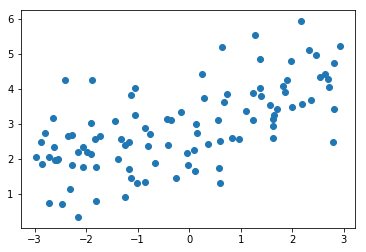

In [4]:
plt.scatter(X,y)
plt.show()

In [6]:
from sklearn.pipeline import  Pipeline
from sklearn.linear_model import  LinearRegression
from sklearn.preprocessing import  PolynomialFeatures
from sklearn.preprocessing import  StandardScaler

In [7]:
def Polynomial_Regression(degree):
    return Pipeline(
    [
        ('poly',PolynomialFeatures(degree=degree)),
        ('stad',StandardScaler()),
        ('lin_reg',LinearRegression())
    ]
    )

# 训练和测试数据集的分离

In [9]:
from sklearn.model_selection import train_test_split
np.random.seed(666)
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [11]:
poly = Polynomial_Regression(20)
poly.fit(X_train,y_train)
y_predict = poly.predict(X_test)

from sklearn.metrics import  mean_squared_error
#均方误差
mean_squared_error(y_predict,y_test)



167.9401087009438

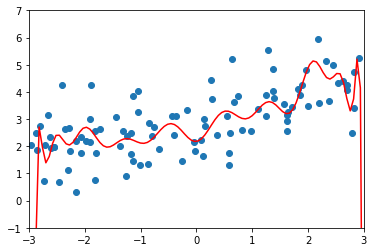

In [19]:
X1 = np.linspace(-3,3,100).reshape(-1,1)
y1 = poly.predict(X1)

plt.scatter(X,y)
plt.plot(X1,y1,color='r')
plt.axis([-3,3,-1,7])
plt.show()

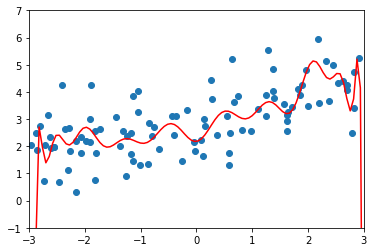

In [22]:
# model 代表我们训练的模型
def plt_modle(model):
    X1 = np.linspace(-3,3,100).reshape(-1,1)
    y1 = model.predict(X1)

    plt.scatter(X,y)
    plt.plot(X1,y1,color='r')
    plt.axis([-3,3,-1,7])
    plt.show()
plt_modle(poly)

# 使用岭回归

In [42]:
#岭回归的调用
from sklearn.linear_model import Ridge

In [24]:
def Ridge_Regression(degree,alpha):
    return Pipeline(
    [
        ('poly',PolynomialFeatures(degree=degree)),
        ('stad',StandardScaler()),
        ('Rid_gre',Ridge(alpha=alpha))
    ]
    )

In [26]:
# alpha 取值为   0.00001
rid_gre = Ridge_Regression(degree=20,alpha=0.00001)
rid_gre.fit(X_train,y_train)
y_pridect_1 = rid_gre.predict(X_test)
mean_squared_error(y_test,y_pridect_1)

1.3874378028910532

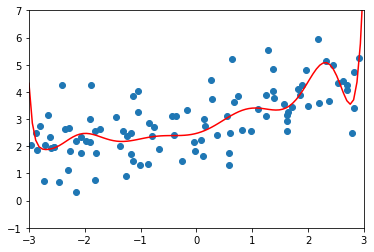

In [27]:
plt_modle(rid_gre)

In [28]:
# alpha 取值为   1
rid_gre1 = Ridge_Regression(degree=20,alpha=1)
rid_gre1.fit(X_train,y_train)
y_pridect_2 = rid_gre1.predict(X_test)
mean_squared_error(y_test,y_pridect_2)

1.1888759304218448

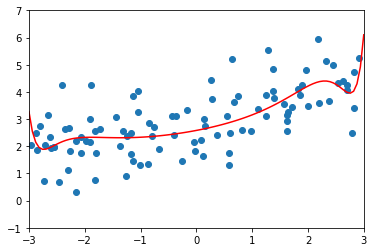

In [30]:
plt_modle(rid_gre1)

In [31]:
# alpha 取值为   10
rid_gre10 = Ridge_Regression(degree=20,alpha=10)
rid_gre10.fit(X_train,y_train)
y_pridect_3 = rid_gre10.predict(X_test)
mean_squared_error(y_test,y_pridect_3)

1.1451272194878865

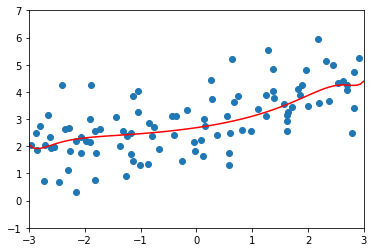

In [33]:
plt_modle(rid_gre10)

In [34]:
# alpha 取值为   100
rid_gre100 = Ridge_Regression(degree=20,alpha=100)
rid_gre100.fit(X_train,y_train)
y_pridect_4 = rid_gre100.predict(X_test)
mean_squared_error(y_test,y_pridect_4)

1.3196456113086197

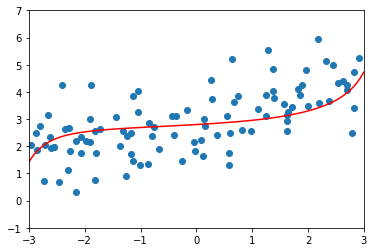

In [37]:
plt_modle(rid_gre100)

In [39]:
# alpha 取值为   100000
rid_gre10000 = Ridge_Regression(degree=20,alpha=1000000)
rid_gre10000.fit(X_train,y_train)
y_pridect_10000 = rid_gre10000.predict(X_test)
mean_squared_error(y_test,y_pridect_10000)

1.8404103153255003

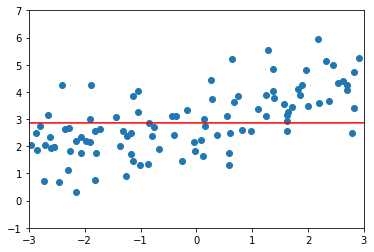

In [41]:
plt_modle(rid_gre10000)

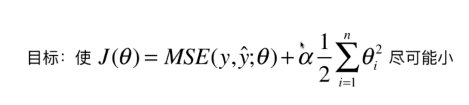

In [ ]:
#这和个原因很好解释   因为 如果求的是最大值   那么我们的损失函数就是求后面的正则化的式子     当alpha太大，我们的theta就接近于0 
#y = 0.5*x + 3 +np.random.normal(0,1,size=100)      那么  theta为0   则 y就接近于3